### Exploratory Data Analysis

import the required libraries

In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory



Reading the data set

In [5]:
df=pd.read_csv('C:/Users/callm/Desktop/eda-on-students-performance-in-exams/StudentsPerformance.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


Here, we can see all the column names, total values and type of the values.

#### We have 2 types of variables.

1. Numerical variables : which contains number as values
2. Categorical variables : which contains descriptions of groups or things.

In this Data set,

Numerical Variables are  Math score, Reading score and Writing score.

Categorical Variables are Gender, Race/ethnicity, Parental level of education, Lunch and Test preparation course.[](http://)

In [7]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


You can see the descriptive statistics of numerical variables such as total count, mean, standard deviation, minimum and maximum values and three quantiles of the data (25%,50%,75%).

In [8]:
df.shape #It shows the number of rows and columns.

(1000, 8)

In [9]:
df.isnull().sum() #checks if there are any missing values

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [10]:
# Check for duplicates
duplicates = df.duplicated()
print("Number of duplicates:", duplicates.sum())

# Remove duplicates
df = df.drop_duplicates()


Number of duplicates: 0


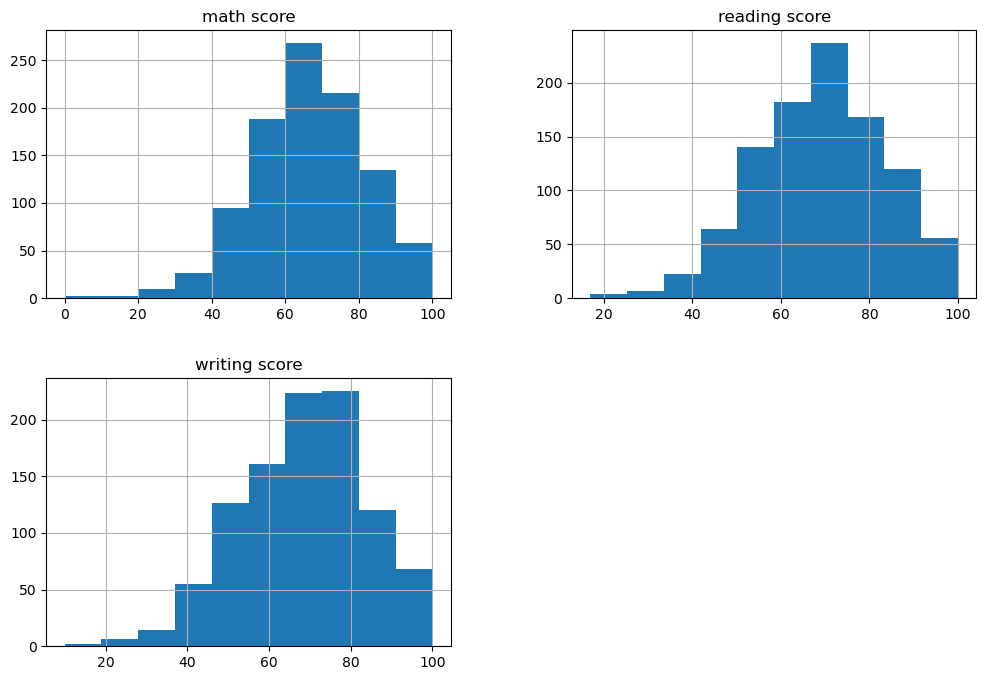

In [11]:
# Plot histograms for numerical variables
df.hist(figsize=(12, 8))
plt.show()


# Univariate Analysis

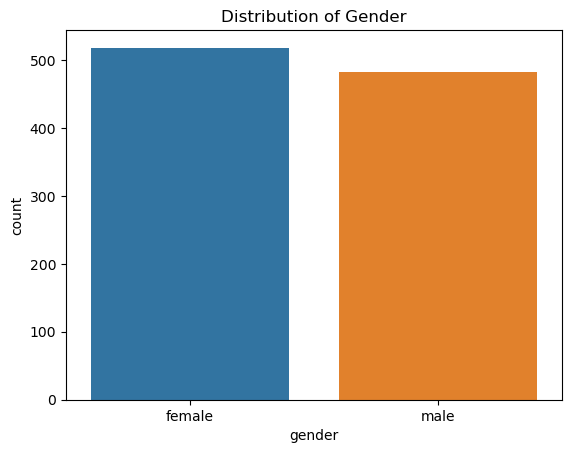

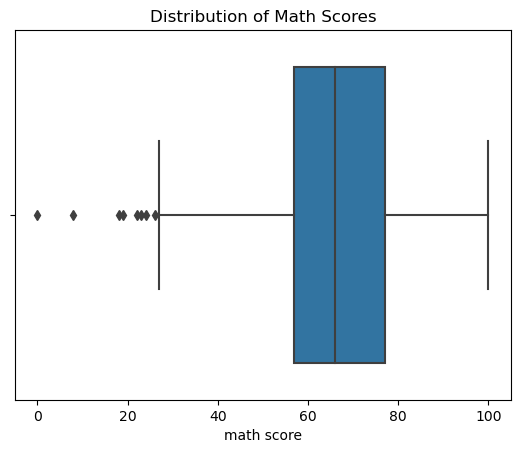

In [12]:
# Bar chart for gender
sns.countplot(x='gender', data=df)
plt.title('Distribution of Gender')
plt.show()

# Box plot for math score
sns.boxplot(x='math score', data=df)
plt.title('Distribution of Math Scores')
plt.show()


# Bivariate analysis

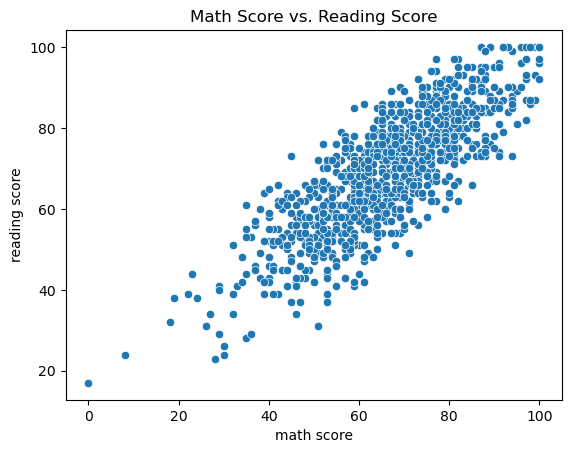

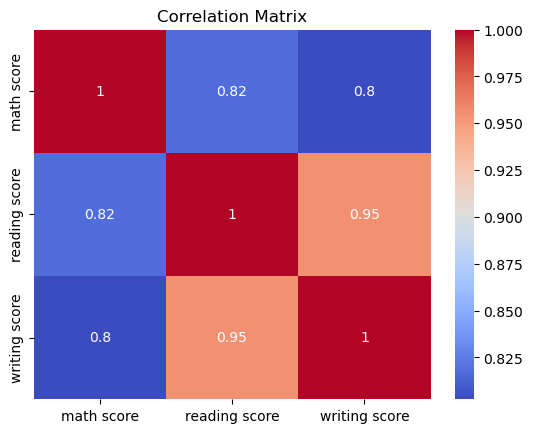

In [13]:
# Scatter plot for math score vs. reading score
sns.scatterplot(x='math score', y='reading score', data=df)
plt.title('Math Score vs. Reading Score')
plt.show()

# Correlation matrix
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Multivariate analysis

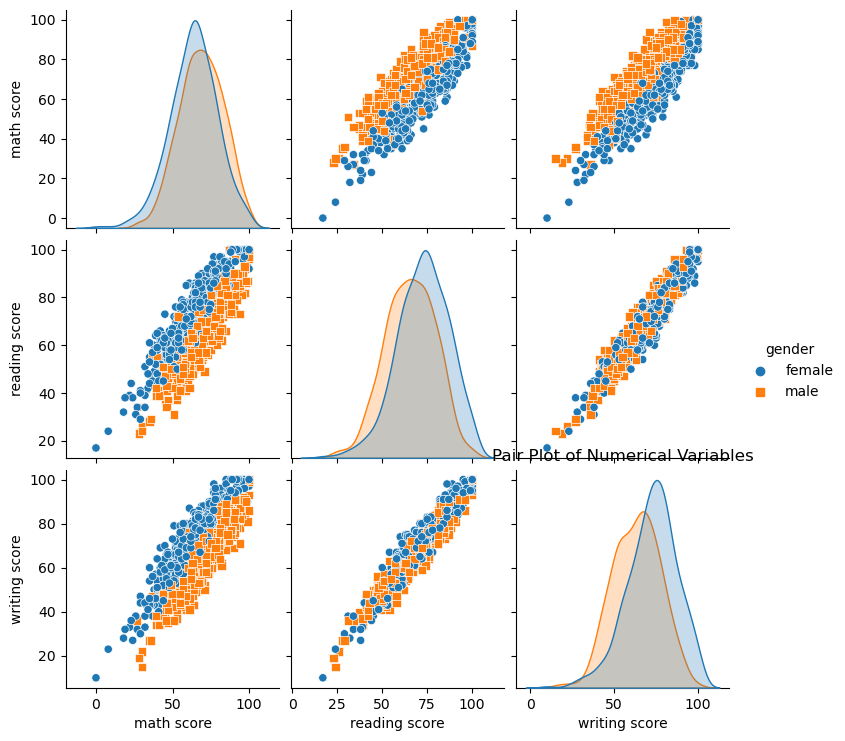

In [14]:
# Pair plot for numerical variables
sns.pairplot(df, hue='gender', markers=["o", "s"])
plt.title('Pair Plot of Numerical Variables')
plt.show()


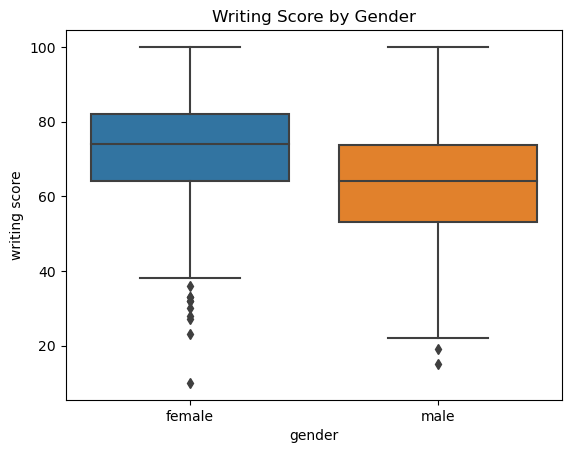

In [15]:
# outliers Detection
# Box plot for writing score, grouped by gender
sns.boxplot(x='gender', y='writing score', data=df)
plt.title('Writing Score by Gender')
plt.show()


Lets see the proportion of the remaining variables

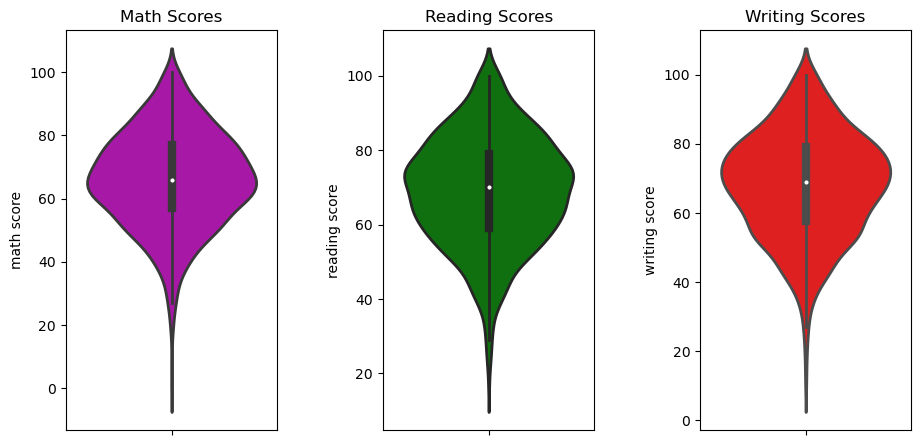

In [16]:
plt.figure(figsize=(15,5))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9,
                      wspace=0.5, hspace=0.2)
plt.subplot(141)
plt.title('Math Scores')
sns.violinplot(y='math score',data=df,color='m',linewidth=2)
plt.subplot(142)
plt.title('Reading Scores')
sns.violinplot(y='reading score',data=df,color='g',linewidth=2)
plt.subplot(143)
plt.title('Writing Scores')
sns.violinplot(y='writing score',data=df,color='r',linewidth=2)
plt.show()

From the above plots, we can see that the maximum number of students have scored 60-80 in all three subjects i.e., math, reading and writing.

drawing some pichats

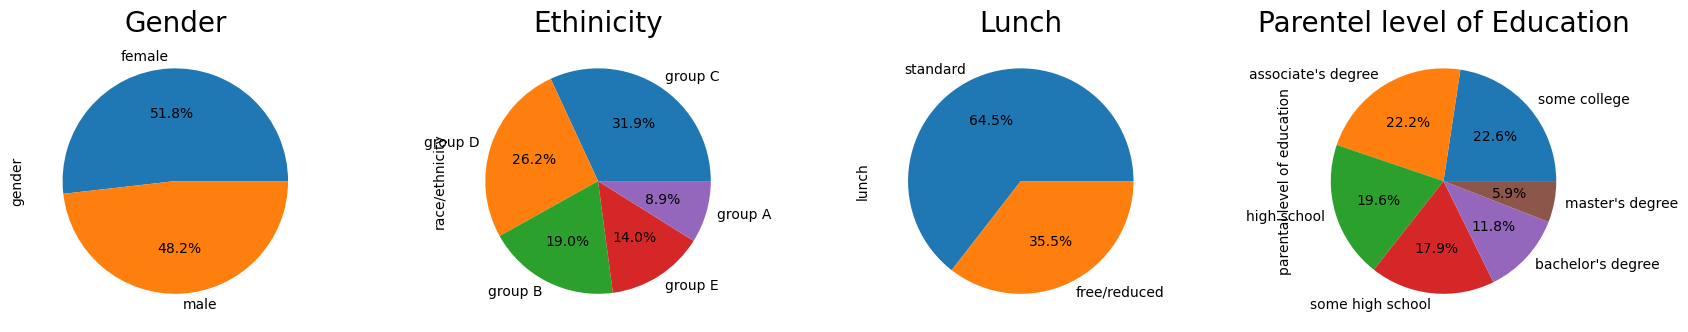

In [17]:
plt.figure(figsize=(20,10))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9,
                      wspace=0.5, hspace=0.2)
plt.subplot(141)
plt.title('Gender',fontsize = 20)
df['gender'].value_counts().plot.pie(autopct="%1.1f%%")

plt.subplot(142)
plt.title('Ethinicity',fontsize = 20)
df['race/ethnicity'].value_counts().plot.pie(autopct="%1.1f%%")

plt.subplot(143)
plt.title('Lunch',fontsize = 20)
df['lunch'].value_counts().plot.pie(autopct="%1.1f%%")

plt.subplot(144)
plt.title('Parentel level of Education',fontsize = 20)
df['parental level of education'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

#### Observations:
* The proportion of male and female are almost same
* Highest number of students belong to Group C ethinicity followed by Group D
* Highest proportion of the students have standard lunch
* Highest proportion of parentel level of Education is 'Some college', 'associate's degreee' and 'high school'

Lets look at the scores of male and female students seperately in each subject.

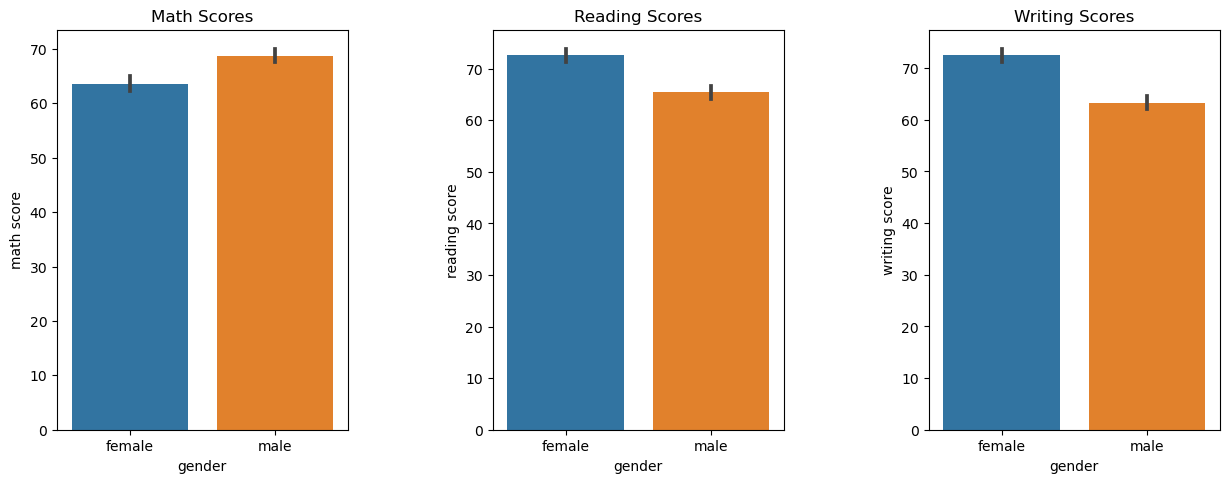

In [18]:
plt.figure(figsize=(15,5))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9,
                      wspace=0.5, hspace=0.2)
plt.subplot(131)
plt.title('Math Scores')
sns.barplot(x="gender", y="math score", data=df)
plt.subplot(132)
plt.title('Reading Scores')
sns.barplot(x="gender", y="reading score", data=df)
plt.subplot(133)
plt.title('Writing Scores')
sns.barplot(x="gender", y="writing score", data=df)
plt.show()

We can see that male students scored higher in Maths where as female students scored higher in Reading and writing

Lets look at the scores who completed Test preperation course

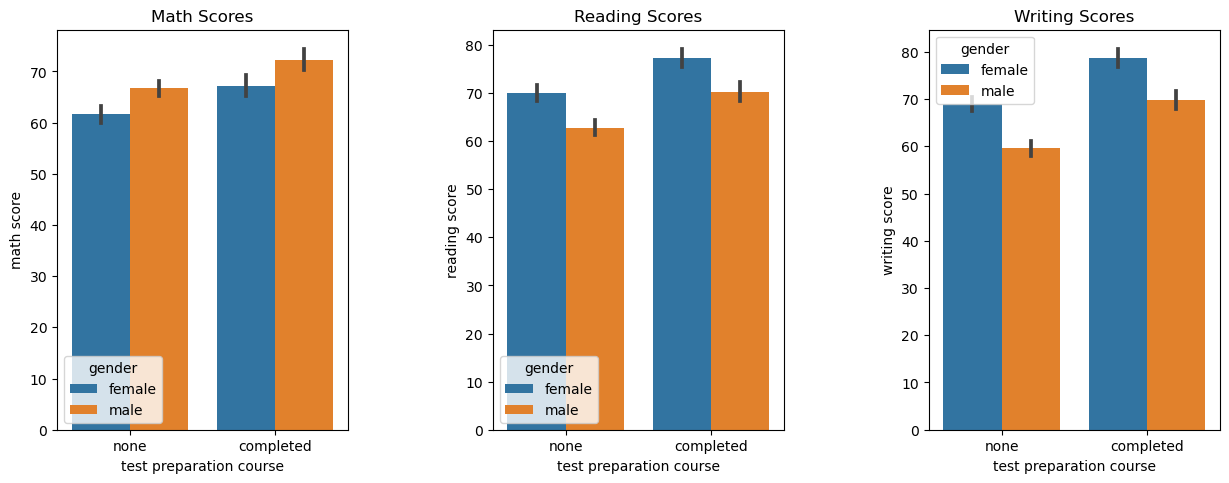

In [19]:
plt.figure(figsize=(15,5))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9,
                      wspace=0.5, hspace=0.2)
plt.subplot(131)
plt.title('Math Scores')
sns.barplot(hue="gender", y="math score", x="test preparation course", data=df)
plt.subplot(132)
plt.title('Reading Scores')
sns.barplot(hue="gender", y="reading score", x="test preparation course", data=df)
plt.subplot(133)
plt.title('Writing Scores')
sns.barplot(hue="gender", y="writing score", x="test preparation course", data=df)
plt.show()

So the students (male and female) who completed the test preparation course scored higher in all three subjects.

Lets look at the scores of the students of different group who completed test preperation course.

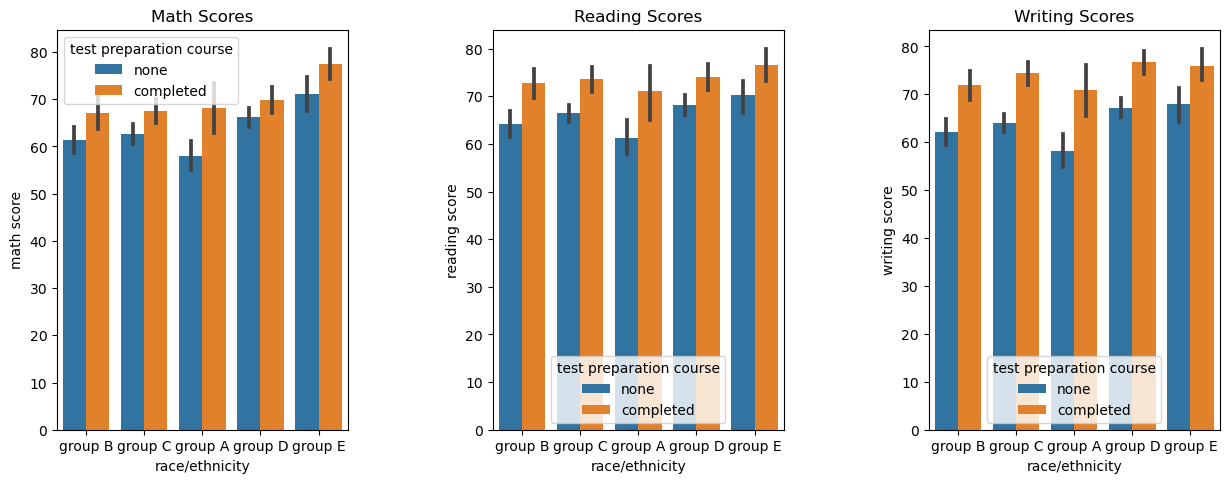

In [20]:
plt.figure(figsize=(15,5))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9,
                      wspace=0.5, hspace=0.2)
plt.subplot(131)
plt.title('Math Scores')
sns.barplot(x="race/ethnicity", y="math score", hue="test preparation course", data=df)
plt.subplot(132)
plt.title('Reading Scores')
sns.barplot(hue="test preparation course", y="reading score", x="race/ethnicity", data=df)
plt.subplot(133)
plt.title('Writing Scores')
sns.barplot(hue="test preparation course", y="writing score", x= 'race/ethnicity',data=df)

plt.show()

Highest number of Students who belongs to Group E has completed the test preperation course in Math and Reading and scored highest. 

Highest number of Students who belongs to Group D and E has completed the test preperation course in Writing and scored highest. 

Now lets analyze the relation between Test preperation course and other variables

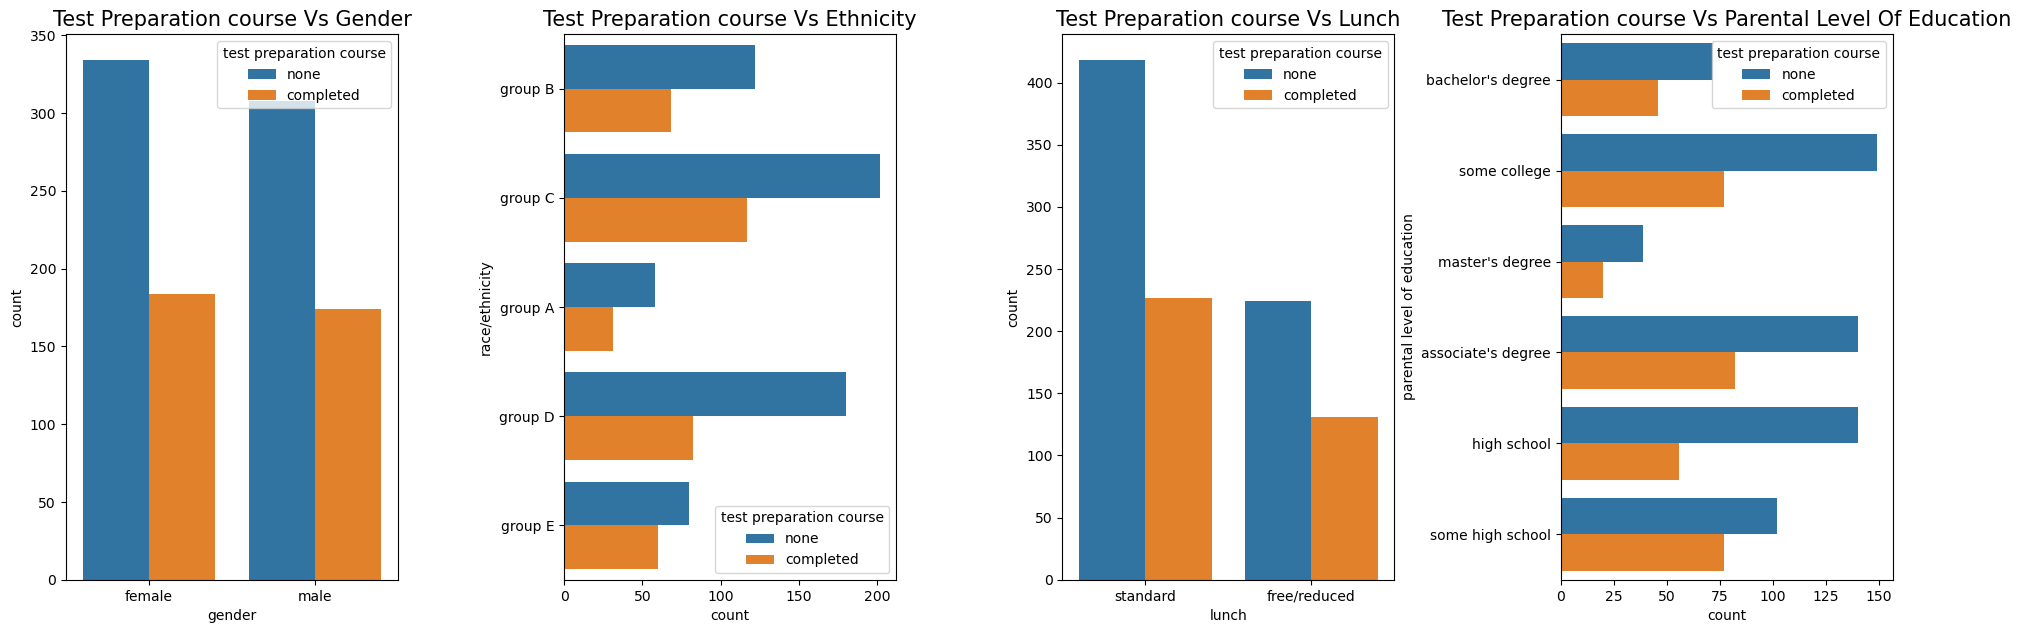

In [21]:
plt.figure(figsize=(30,15))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9,
                      wspace=0.5, hspace=0.2)
plt.subplot(251)
plt.title('Test Preparation course Vs Gender',fontsize = 15)
sns.countplot(hue="test preparation course", x="gender", data=df)

plt.subplot(254)
plt.title('Test Preparation course Vs Parental Level Of Education',fontsize = 15)
sns.countplot(hue="test preparation course", y="parental level of education", data=df)

plt.subplot(253)
plt.title('Test Preparation course Vs Lunch',fontsize = 15)
sns.countplot(hue="test preparation course", x="lunch", data=df)

plt.subplot(252)
plt.title('Test Preparation course Vs Ethnicity',fontsize = 15)
sns.countplot(hue="test preparation course", y="race/ethnicity", data=df)

plt.show()

#### Observations:
* Most of the students have not completed the test preparation course.
* Highest number Students who belong to group C ethinicity have completed the test preparation course.
* Standard lunch students have completed the test preparation course
* Students whos parental level of education is 'some college, 'associate's degree', and high school have completed the test preparation course.

We can also say that the students who belongs to Group E ethincity has scored more marks in all three subjectes even though they have not completed the test preparation course.

Now, lets see the relation between the remaining variables

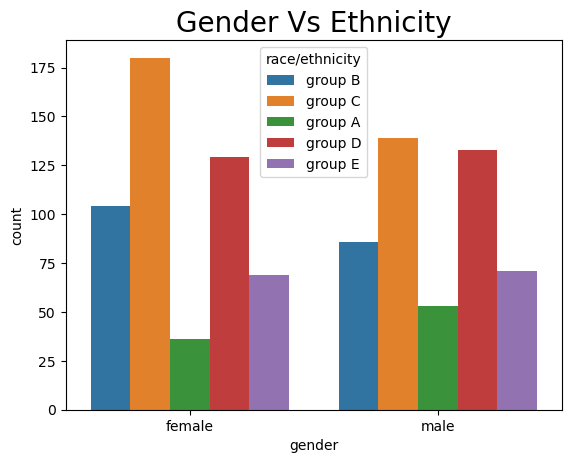

In [22]:
plt.title('Gender Vs Ethnicity',fontsize = 20)
sns.countplot(x="gender", hue="race/ethnicity", data=df)
plt.show()

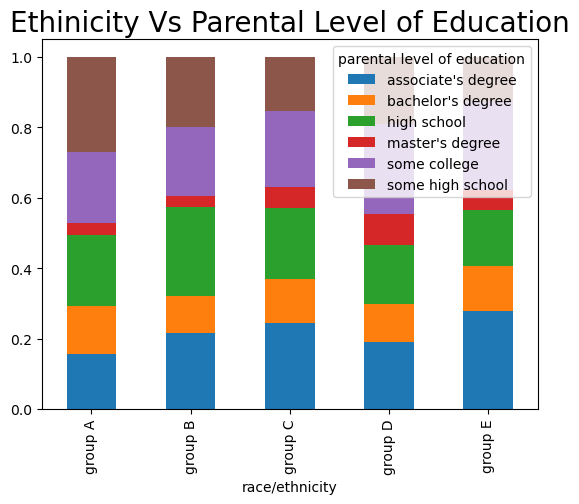

In [23]:
pr=pd.crosstab(df['race/ethnicity'],df['parental level of education'],normalize=0)

pr.plot.bar(stacked=True)
plt.title('Ethinicity Vs Parental Level of Education',fontsize = 20)
plt.show()

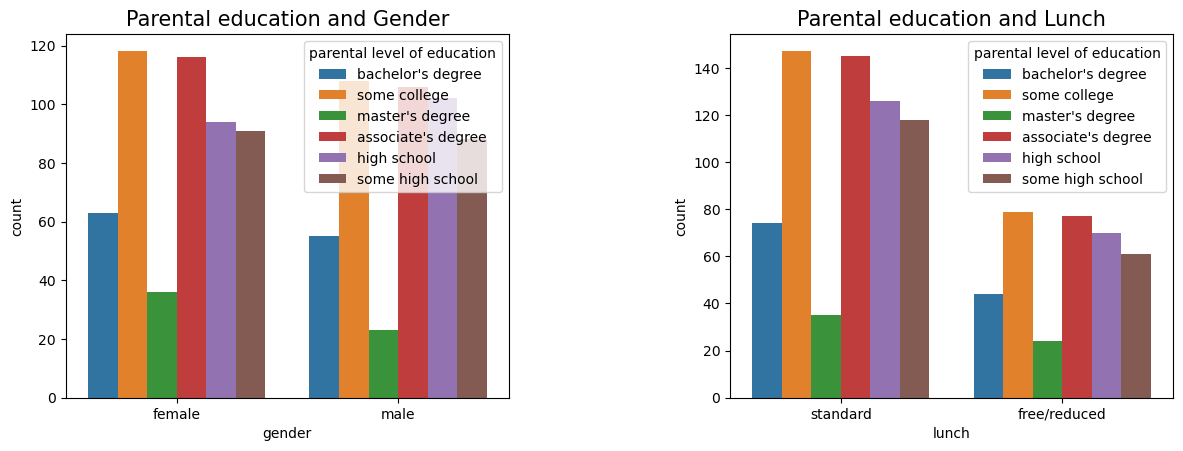

In [24]:
plt.figure(figsize=(40,10))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9,
                      wspace=0.5, hspace=0.2)
plt.subplot(251)
plt.title('Parental education and Gender',fontsize=15)
sns.countplot(hue="parental level of education", x="gender", data=df)
plt.subplot(252)
plt.title('Parental education and Lunch',fontsize=15)
sns.countplot(hue="parental level of education", x="lunch", data=df)

plt.show()

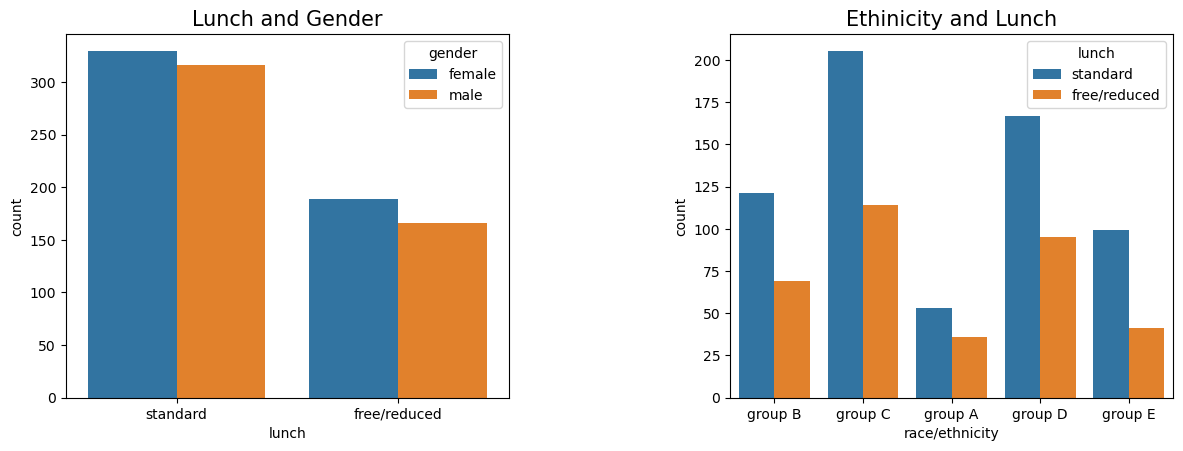

In [25]:
plt.figure(figsize=(40,10))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9,
                      wspace=0.5, hspace=0.2)
plt.subplot(251)
plt.title('Lunch and Gender',fontsize=15)
sns.countplot(x="lunch", hue="gender", data=df)
plt.subplot(252)
plt.title('Ethinicity and Lunch',fontsize=15)
sns.countplot(x="race/ethnicity", hue="lunch", data=df)
plt.show()

To analyse the data in more deeper way, lets few new columns: Total marks, Percentage and Grades.

In [37]:
df['total marks']=df['math score']+df['reading score']+df['writing score']

In [38]:
df['percentage']=df['total marks']/300*100


Assigning grades.

Criteria of the grades are as follows:

* 85-100 : Grade A
* 70-84 : Grade B
* 55-69 : Grade C
* 35-54 : Grade D
* 0-35 : Grade E

In [39]:

#Assigning the grades

def determine_grade(scores):
    if scores >= 85 and scores <= 100:
        return 'Grade A'
    elif scores >= 70 and scores < 85:
        return 'Grade B'
    elif scores >= 55 and scores < 70:
        return 'Grade C'
    elif scores >= 35 and scores < 55:
        return 'Grade D'
    elif scores >= 0 and scores < 35:
        return 'Grade E'
    
df['grades']=df['percentage'].apply(determine_grade)

#  percentage and grades columns are cre

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   object 
 1   race/ethnicity               1000 non-null   object 
 2   parental level of education  1000 non-null   object 
 3   lunch                        1000 non-null   object 
 4   test preparation course      1000 non-null   object 
 5   math score                   1000 non-null   int64  
 6   reading score                1000 non-null   int64  
 7   writing score                1000 non-null   int64  
 8   total marks                  1000 non-null   int64  
 9   percentage                   1000 non-null   float64
 10  grades                       1000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 126.0+ KB


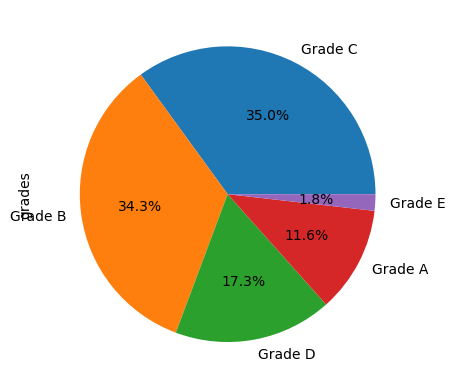

In [41]:
df['grades'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()